In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

# linear SVM

[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[cmap color](https://matplotlib.org/examples/color/colormaps_reference.html)

## load data

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())

data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [3]:
min(data['X1']), max(data['X1']), min(data['X2']), max(data['X2'])

(0.086405, 4.015, 1.6177, 4.6162)

## visualize data

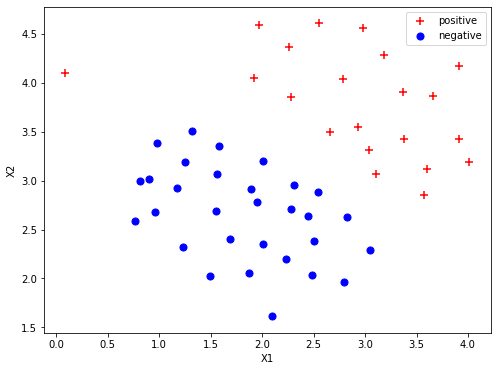

In [4]:
positive = data[data.y == 1]
negative = data[data.y == 0]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## try C = 1

In [5]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge', max_iter=20000)
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

## decision boundary

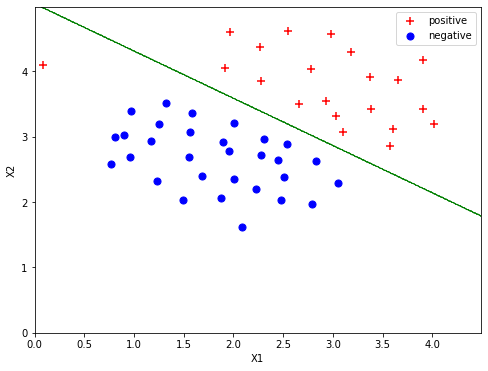

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
positive = data[data.y == 1]
negative = data[data.y == 0]

ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc1.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

In [7]:
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

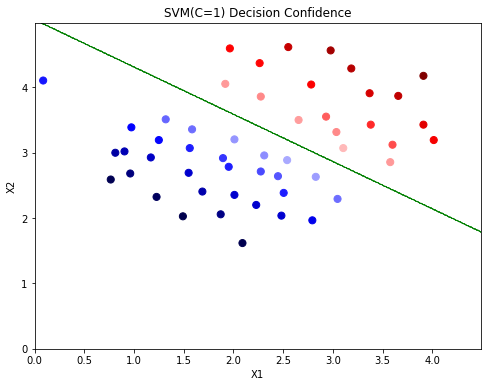

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='seismic')
ax.set_title('SVM(C=1) Decision Confidence')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc1.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

## try C = 400

C对应正则化的$\lambda$，$C = \frac{1}{\lambda}$，C越大越容易过拟合。图像中最左侧的点被划分到右侧。


In [9]:
svc400 = sklearn.svm.LinearSVC(C=400, loss='hinge', max_iter=80000)
svc400.fit(data[['X1', 'X2']], data['y'])
svc400.score(data[['X1', 'X2']], data['y'])

1.0

## decision boundary

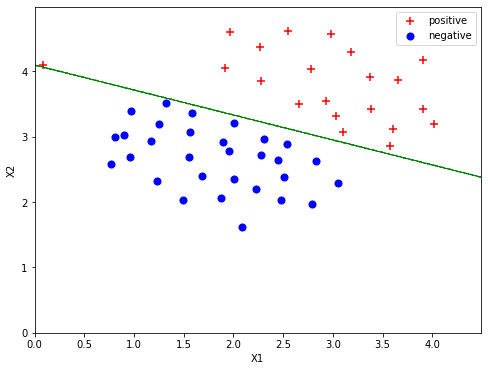

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
positive = data[data.y == 1]
negative = data[data.y == 0]

ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc400.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

In [11]:
# # The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM400 Confidence'] = svc400.decision_function(data[['X1', 'X2']])

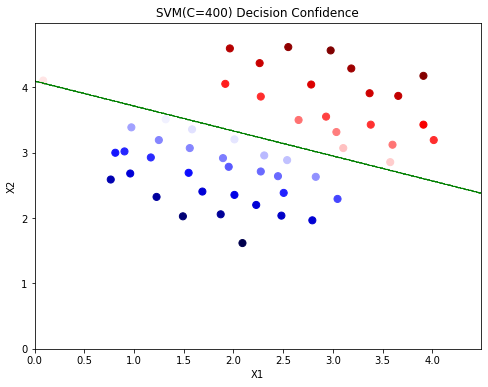

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM400 Confidence'], cmap='seismic')
ax.set_title('SVM(C=400) Decision Confidence')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc400.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

In [13]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM400 Confidence
0,1.9643,4.5957,1,0.802821,9.962558
1,2.2753,3.8589,1,0.383912,5.032700
2,2.9781,4.5651,1,1.377490,12.808046
3,2.9320,3.5519,1,0.521180,4.584999
4,3.5772,2.8560,1,0.333432,0.999897
